# Correlations between datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D      
from scipy import stats  

#### Import all data
ms_data = dataframe with normalised intensites : samples x molecules

using first replicate

In [2]:
# ms data
data = pd.read_csv('data/cas_intensities.csv', delimiter=',', index_col = 0)
# only use first repliate
data = data[data["replicate"]==1]
ms_data_original = data.drop(columns=["replicate"])
ms_data = ms_data_original.copy()
ms_data = ms_data.apply(lambda row: row/row.mean(),axis=1)
ms_data = stats.zscore(np.log(ms_data))


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [3]:
ms_data

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,13466-78-9,483-76-1,36564-42-8,705-86-2,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3
sample_key,,,,,,,,,,,,,,,,,,,,,
000920,0.483619,-0.114381,-0.322851,-0.766861,0.676691,0.676691,0.540400,0.483619,0.483619,-0.114381,...,0.505048,0.676691,-0.322851,1.142312,1.142312,0.016589,0.676691,0.676691,0.505048,0.846526
000922,-0.673300,-0.710644,-0.256912,-0.024654,0.753509,0.753509,0.873259,-0.673300,-0.673300,-0.710644,...,-0.452395,0.753509,-0.256912,1.042358,1.042358,0.871647,0.753509,0.753509,-0.452395,0.887243
000927,-0.592356,-0.713052,0.384683,0.686874,0.625205,0.625205,1.143411,-0.592356,-0.592356,-0.713052,...,-0.034912,0.625205,0.384683,0.965866,0.965866,0.440485,0.625205,0.625205,-0.034912,-0.038107
000911,-0.940888,-1.354943,0.314467,0.654694,0.962180,0.962180,1.454942,-0.940888,-0.940888,-1.354943,...,0.294575,0.962180,0.314467,0.754278,0.754278,1.359705,0.962180,0.962180,0.294575,1.076670
000925,-0.577039,-0.472778,-0.150522,0.287070,0.773625,0.773625,0.726969,-0.577039,-0.577039,-0.472778,...,-0.414200,0.773625,-0.150522,1.155112,1.155112,0.694950,0.773625,0.773625,-0.414200,0.490748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000596,-0.080473,0.906595,-1.302547,-1.693571,-0.494823,-0.494823,-0.489750,-0.080473,-0.080473,0.906595,...,-0.451218,-0.494823,-1.302547,0.726406,0.726406,-1.136580,-0.494823,-0.494823,-0.451218,-0.368768
000804,-0.561448,0.558933,-0.775764,-0.019993,-0.033876,-0.033876,-0.283169,-0.561448,-0.561448,0.558933,...,-1.111976,-0.033876,-0.775764,-0.331727,-0.331727,-0.575868,-0.033876,-0.033876,-1.111976,0.347513
000853,1.791938,-0.073061,0.078029,-0.227094,0.225883,0.225883,-1.162357,1.791938,1.791938,-0.073061,...,0.560392,0.225883,0.078029,-1.744643,-1.744643,-0.935019,0.225883,0.225883,0.560392,0.686937


panelist_data_df = dataframe with panelist data : samples x flavors

using values from 1. panelist

In [4]:
panelist_data_df = pd.read_table("data/vlb_data_combined.txt", delimiter=',', index_col = 1)
panelist_data_df = panelist_data_df[panelist_data_df["panelist"]==1]
panelist_data_df = panelist_data_df.drop(columns=["panelist", "date"])

show distribution of each flavor in the panelist data

In [5]:
flavors = ['Floral','Fruity','Woody','Complexity','Malt','Sweet','Peaty','Dried_fruits','Aftertaste']

##### distribution of flavor in panelist data

In [6]:
'''plt.figure(figsize=(20,20))
i = 0
for flavor in flavors:
    i+=1
    counts = panelist_data_df[flavor].value_counts()

    plt.subplot(4,3,i)
    plt.bar(counts.index, counts.values, color='skyblue',width=8)
    plt.xlabel('intensity')
    plt.ylabel('Frequency')
    plt.title(flavor)#
plt.show()
'''

"plt.figure(figsize=(20,20))\ni = 0\nfor flavor in flavors:\n    i+=1\n    counts = panelist_data_df[flavor].value_counts()\n\n    plt.subplot(4,3,i)\n    plt.bar(counts.index, counts.values, color='skyblue',width=8)\n    plt.xlabel('intensity')\n    plt.ylabel('Frequency')\n    plt.title(flavor)#\nplt.show()\n"

### 1. Correlation between one flavor and ms data

ms_data_comp = df of ms data containing only comparable samples


panelist_data_comp = df of panelist data containing only comparable samples

In [7]:
# get only comparable samplekeys = 197 samples
valid_indexes = [index for index in panelist_data_df.index if index in ms_data.index]
ms_data_comp = ms_data.loc[valid_indexes]
panelist_data_comp = panelist_data_df.loc[valid_indexes]

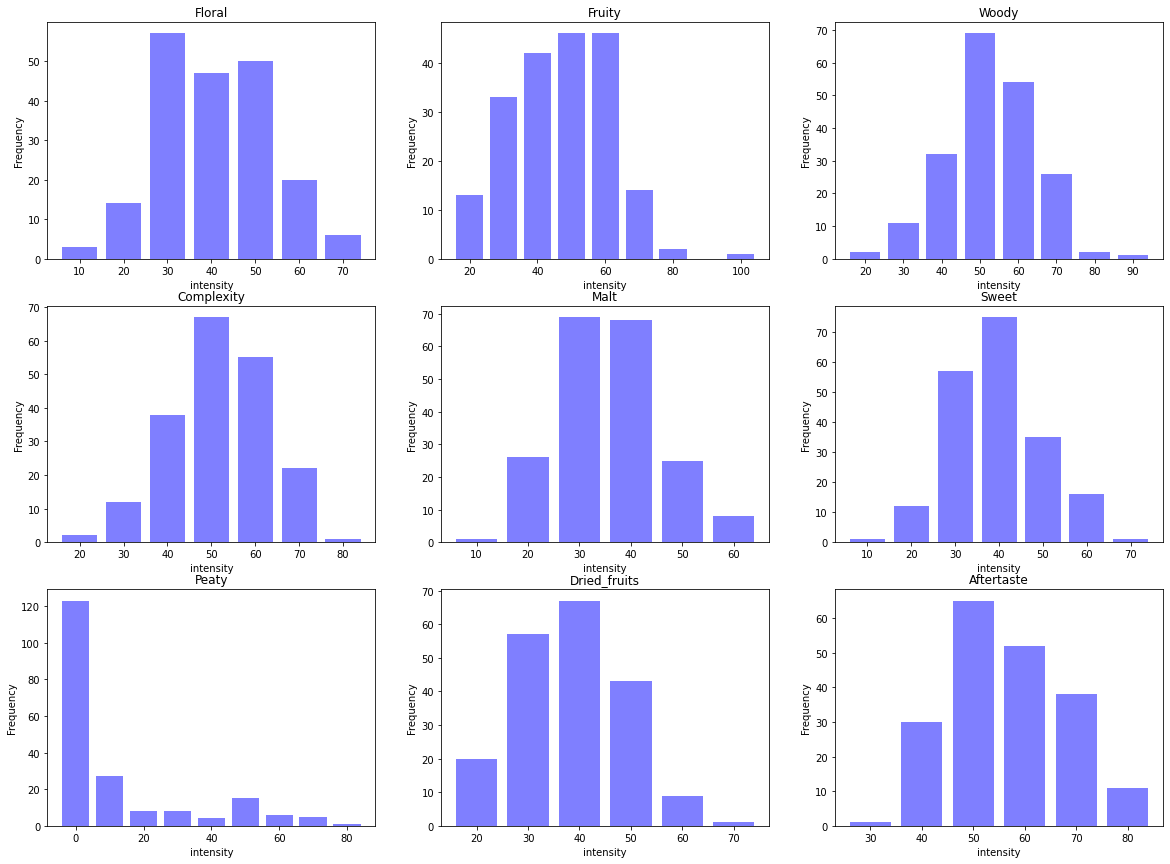

In [8]:
plt.figure(figsize=(20,20))
i = 0
for flavor in flavors:
    i+=1
    counts = panelist_data_comp[flavor].value_counts()

    plt.subplot(4,3,i)
    plt.bar(counts.index, counts.values, color='b',alpha = 0.5,width=8)
    plt.xlabel('intensity')
    plt.ylabel('Frequency')
    plt.title(flavor)
plt.show()


### Find all descriptors for each flavor: Sweet, Fruity, Woody, Malt

In [9]:
# find CAS number to each molecule
CAS_to_mol = pd.read_table("data/CAS_mol_OD.csv", delimiter=',',  names= ["CAS","intensity", "odor"])
CAS_to_mol=CAS_to_mol.drop(columns=["intensity","odor"])
CAS_to_mol= CAS_to_mol.drop_duplicates()
CAS_to_mol

,CAS
(-)-carvone,6485-40-1
(-)-cis-rose oxide,3033-23-6
(-)-cubenol,21284-22-0
(-)-nootkatone,38427-78-0
(-)-β-bisabolene,495-61-4
...,...
δ-dodecalactone,713-95-1
δ-elemene,20307-84-0
δ-muurolene,120021-96-7
δ-terpinene,586-62-9


sweet_descriptors =  all molecules that where labeled as sweet in flavornet

In [10]:
# all molecules that where labeled as sweet in flavornet
sweet_descriptors = ["benzyl alcohol","ethyl phenylacetate","tridecanal","nerol","methyl hexanoate","linalyl isovalerate","undecanaldehyde","caryophyllene oxide","linalyl acetate","safranal","uncineol","phenylethanal","p-anisaldehyde","eudesmol","ethylmethyl pyrazine","citronellyl butyrate","4-methyl-3-penten-2-one","nonyl acetate","10-epi-γ-eudesmol","β-bisabolol","(Z)-6-dodecene-γ-lactone","β-farnesene","2-dodecenal","γ-dodecalactone","epoxy-β-ionone","2-undecenal","styrene glycol","methyl furaneol","(-)-cis-rose oxide","(E)-β-ocimene","dimethylmethoxyfuranone","1,8-cineole","ethylbenzaldehyde","2-pentylthiophene","α-farnesene","methionol","7-methoxycoumarin","(Z)-3-hexenyl-2-methylbutanoate","o-aminoacetophenone","viridiflorol","isopiperitone","β-sinensal","ethyl vanillate","methyl butanoate","p-methoxystyrene","ethanol","6-Methoxyeugenol","4-hexanolide","δ-dodecalactone","sesquiphellandrene","diethyl malate","linalyl butyrate","guaiacol","coumarin","methyl benzoate","isopropyl benzoate","safrole","durene","γ-butyrolactone","ethyl isobutyrate","furfural"]
fruit_descriptors = ["ethyl phenylacetate", "geranyl valerate", "γ-heptalactone", "ethyl propionate", "diethyl acetal", "geranyl butyrate", "ethyl heptylate", "ethyl octanoate", "methyl hexanoate", "dimethylheptenal", "pentanone", "ethyl 3-methylbutanoate", "geranyl isovalerate", "isobutyl acetate", "ethoxypropanol", "methyl-2-butenal", "methylnonanedione", "linalyl acetate", "methyl geranate", "limonene oxide", "hydrocinnamic alcohol", "diethyl succinate", "ethyl hexanoate", "ethylmethyl pyrazine", "β-cubebene", "neryl acetate", "citronellyl butyrate", "hexyl acetate", "nonyl acetate", "butyl methylbutyrate", "pentenal", "isopentyldimethylpyrazine", "p-menth-1-en-9-ol", "hexadecanone", "octyl acetate", "γ-dodecalactone", "epoxy-β-ionone", "ethyl octenoate", "ethyl isohexanoate", "isobornyl propionate", "cedrenol", "p-menth-1-en-9-yl acetate", "cadinadiene", "(Z)-3-hexenyl hexanoate", "ethyl cyclohexanoate", "4-methylthio-2-butanone", "3,5-octadienone", "methyl cyclohexanecarboxylate", "2-pentylthiophene", "α-ocimene", "butanediol", "ethyl valerate", "pentanol", "isopiperitone", "butyl octanoate", "ethyl vanillate", "methyl butanoate", "2-methylbutyl acetate", "propyl hexanoate", "butyl hexanoate", "isopropyl butanoate", "spathulenol", "butanol", "δ-dodecalactone", "methyl quinoxaline", "sesquiphellandrene", "2-hexenol", "ethyl benzoate", "isopropyl benzoate", "ethyl lactate", "citronellyl isobutyrate"]
wood_descriptors = ["α-muurolene","cadina-1,4-dien-3-ol","isocaryophyllene","eudesmol","α-ionone","bornyl butyrate","(E)-α-bergamotene","linalool oxide","ethyl pyrazine","10-epi-γ-eudesmol","germacrene B","trans-sabinene hydrate","dihydrolinalool","isodihydrocarveol","β-farnesene","β-sesquiphellandrene","δ-elemene","α-calacorene","epoxy-β-ionone","germacrene D","bicyclogermacrene","alloaromadendrene","α-thujene","oxo-β-ionone","(-)-γ-elemene","γ-muurolene","sabinene","α-guaiene","α-copaene","γ-cadinene","nerolidol","β-eudesmol","α-cadinol","δ-cadinene","dill apiol","aromadendrene","α-gurjunene","guaiol","α-farnesene","γ-selinene","cuminica lcohol","perillen","elemol","α-humulene","β-caryophyllene","β-guaiene"]
malt_descriptors = ["pentanal","3-methyl-1-butanol","2-methyl-1-butanol","methylbutanal","isobutyraldehyde"]

In [11]:
violin_df = pd.DataFrame.copy(ms_data_comp)

In [12]:
def add_category(descriptors, flavor, under_bond,upper_bond):
    descriptors_CAS = [CAS_to_mol.loc[index]['CAS'] for index in descriptors if index in CAS_to_mol.index]
    sample_ids = panelist_data_comp[panelist_data_comp[flavor]>= upper_bond].index
    true_sample_ids = panelist_data_comp[panelist_data_comp[flavor]>= upper_bond].index
    false_sample_ids = panelist_data_comp[panelist_data_comp[flavor]<= under_bond].index
    violin_df["category_" + str(flavor)]= list((pd.Series(violin_df.index)).apply((lambda x: 1 if x in true_sample_ids else (-1 if x in false_sample_ids else 0))))

In [13]:
print(panelist_data_comp['Sweet'].median())
print(panelist_data_comp['Fruity'].median())
print(panelist_data_comp['Woody'].median())
print(panelist_data_comp['Malt'].median())


40.0
50.0
50.0
40.0


In [14]:
add_category(sweet_descriptors, "Sweet", 20,50)
add_category(fruit_descriptors, "Fruity",30,70)
add_category(wood_descriptors, "Woody",40,70)
add_category(malt_descriptors,"Malt", 20,50 )

In [15]:
# find cas numbers for these molecules
sweet_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"]for index in sweet_descriptors if index in CAS_to_mol.index ]
fruit_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"] for index in fruit_descriptors if index in CAS_to_mol.index]
wood_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"] for index in wood_descriptors if index in CAS_to_mol.index]
malt_descriptors_CAS  =[CAS_to_mol.loc[index]["CAS"] for index in malt_descriptors if index in CAS_to_mol.index]

violin_df = containing all CAS numbers and comparable samples plus their category meaning if the sample was categorized sweet, not sweet or average sweet regarding the panelist data

In [16]:
violin_df

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3,category_Sweet,category_Fruity,category_Woody,category_Malt
sample_key,,,,,,,,,,,,,,,,,,,,,
000656,0.654597,0.504045,-0.484121,-1.124328,-0.873298,-0.873298,-0.004999,0.654597,0.654597,0.504045,...,0.813270,-0.861840,-0.873298,-0.873298,0.070743,-0.492603,0,-1,0,0
000657,0.164214,0.928648,-0.799496,-1.270475,-1.071480,-1.071480,-0.003429,0.164214,0.164214,0.928648,...,0.795232,-1.112654,-1.071480,-1.071480,-0.473292,-0.653023,0,0,0,0
000658,0.289073,0.135427,0.126255,0.124218,-0.106765,-0.106765,0.589666,0.289073,0.289073,0.135427,...,0.538315,-0.160557,-0.106765,-0.106765,0.219140,-0.758779,0,0,0,0
000838,1.043792,-0.229280,1.810010,1.741901,1.079154,1.079154,-1.540093,1.043792,1.043792,-0.229280,...,-1.725093,-0.023330,1.079154,1.079154,1.156936,0.859872,1,1,0,0
000839,2.139363,0.751552,1.659463,1.118391,-0.010795,-0.010795,-2.163393,2.139363,2.139363,0.751552,...,-1.634097,-0.517266,-0.010795,-0.010795,-1.017367,-0.230018,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000925,-0.577039,-0.472778,-0.150522,0.287070,0.773625,0.773625,0.726969,-0.577039,-0.577039,-0.472778,...,1.155112,0.694950,0.773625,0.773625,-0.414200,0.490748,0,0,0,0
000926,0.636501,-0.458241,0.087082,0.355739,0.241522,0.241522,0.436841,0.636501,0.636501,-0.458241,...,1.047632,0.081468,0.241522,0.241522,0.563532,0.254898,0,0,0,0
000927,-0.592356,-0.713052,0.384683,0.686874,0.625205,0.625205,1.143411,-0.592356,-0.592356,-0.713052,...,0.965866,0.440485,0.625205,0.625205,-0.034912,-0.038107,1,0,0,0


### Correlation over all samples

check correlation

samples which are categorised in sweet should be highly expressed in cas numbers which are labeled as sweet

function which checks if intensity over all sweet samples should be higher than intensity over not sweet or average samples 

In [17]:
'''
if the difference is > 1.5 than H0 ist true and cas is significant, meaning over all labeled samples it is highly expressed for the flavor it was labeld with 
'''
def check_CAS(df,CAS, OSA):
    # check mean of one cas number over all sweet samples is higher than mean of cas numbers over all not sweet samples
    # add entries for other OSAs in the future
    flavor_true = df[df["category_" + OSA] == 1].index
    flavor_false = df[df["category_"+ OSA] == -1].index
    mean_flavor_true = np.mean(df[CAS].loc[flavor_true])
    mean_flavor_false = np.mean(df[CAS].loc[flavor_false])
    #print("flavor_true:"+str(mean_flavor_true))
    #print("flavor_false:"+str(mean_flavor_false))
    difference=mean_flavor_true-mean_flavor_false
    return difference

#### check two example CAS numbers

2463-77-6: sweet

6485-40-1: not sweet

In [18]:
check_CAS(violin_df,'2463-77-6','Sweet')

0.5761309675024383

In [19]:
check_CAS(violin_df, '6485-40-1', 'Sweet')

0.15027197348318738

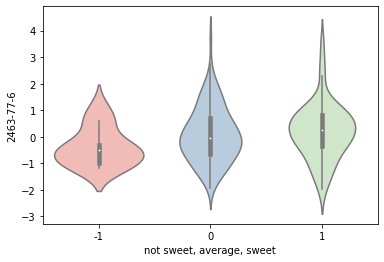

In [20]:
# looking at one specific cas number which was categories as sweet
sns.violinplot(x='category_Sweet',y= '2463-77-6', data=violin_df, palette="Pastel1")
plt.xlabel("not sweet, average, sweet")
plt.show()

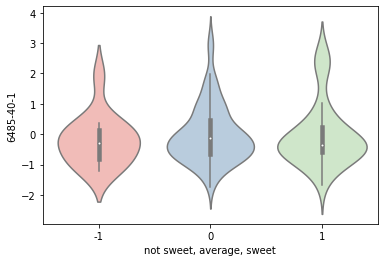

In [21]:
# looking at one specific cas number which was not categories as sweet
sns.violinplot(x='category_Sweet',y= '6485-40-1' , data=violin_df[:-1], palette="Pastel1")
plt.xlabel("not sweet, average, sweet")
plt.show()

#### check labeled molecules per flavor  over all samples

looking at e.g all sweet CAS numbers and how the intensite of these change in sweet, average sweet and not sweet samples

In [22]:
def get_flavored_CAS(desc_CAS, flavor):
    # filter for CAS numbers labeled sweet
    flavor_cas_vdf = pd.DataFrame.copy(violin_df[desc_CAS] )
    flavor_cas_vdf['category_' + str(flavor)] = pd.DataFrame.copy(violin_df['category_'+ str(flavor)])
    flavor_cas_vdf["sum"]= flavor_cas_vdf.apply(lambda row:row[0:-1].sum(), axis=1)
    flavor_cas_vdf["mean"]= flavor_cas_vdf.apply(lambda row:row[0:-2].mean(), axis=1)
    flavor_cas_vdf["median"]= flavor_cas_vdf.apply(lambda row:row[0:-3].median(), axis=1)
    return(flavor_cas_vdf)

In [23]:
# create df for each flavor
sweet_cas_violin_df = get_flavored_CAS(sweet_descriptors_CAS,"Sweet")
woody_cas_violin_df = get_flavored_CAS(wood_descriptors_CAS,"Woody")
fruity_cas_violin_df = get_flavored_CAS(fruit_descriptors_CAS,"Fruity")
malt_cas_violin_df = get_flavored_CAS(malt_descriptors_CAS,"Malt")

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Franz\

In [24]:
malt_cas_violin_df
# not enough data -> exclude from analysis

,110-62-3,123-51-3,137-32-6,590-86-3,78-84-2,category_Malt,sum,mean,median
sample_key,,,,,,,,,
000656,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
000657,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
000658,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
000838,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
000839,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
000925,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
000926,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
000927,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN


In [25]:
sweet_cas_violin_df_labeled = sweet_cas_violin_df.copy()
sweet_cas_violin_df_labeled['category_Sweet_label'] = sweet_cas_violin_df_labeled['category_Sweet'].replace({
    0: 'average flavor',
    1: 'flavor-specific',
    -1: 'not-flavor'
})

sweet_cas_violin_df_labeled = sweet_cas_violin_df_labeled.drop(columns=['category_Sweet'])

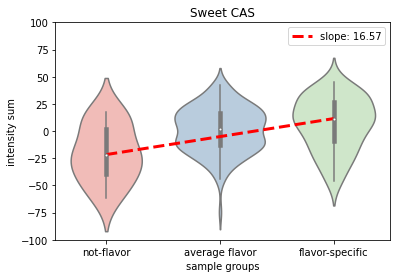

In [26]:
# looking at all cas number which were categories as sweet over all samples

sns.violinplot(x='category_Sweet_label', y='sum', data=sweet_cas_violin_df_labeled, palette="Pastel1", order=['not-flavor','average flavor', 'flavor-specific'])


# lines
medians = sweet_cas_violin_df_labeled.groupby("category_Sweet_label")["sum"].median()

x_vals = [0, len(medians)-1] 
y_vals = [medians.iloc[-1], medians.iloc[1]] 
slope = (y_vals[1]- y_vals[0]) / (x_vals[1] - x_vals[0])

plt.plot(x_vals, y_vals, color='r', linestyle='--', linewidth=3, label=f'slope: {slope:.2f}')

plt.legend()

plt.title("Sweet CAS")
plt.ylabel("intensity sum")
plt.xlabel("sample groups")
plt.ylim(-100, 100)
plt.show()

In [27]:
fruity_cas_violin_df_labeled = fruity_cas_violin_df.copy()
fruity_cas_violin_df_labeled['category_Fruity_label'] = fruity_cas_violin_df_labeled['category_Fruity'].replace({
    0: 'average flavor',
    1: 'flavor-specific',
    -1: 'not-flavor'
})

fruity_cas_violin_df_labeled = fruity_cas_violin_df_labeled.drop(columns=['category_Fruity'])

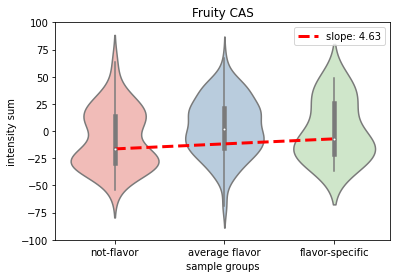

In [28]:
# looking at all cas number which were categories as sweet over all samples
sns.violinplot(x='category_Fruity_label', y='sum', data=fruity_cas_violin_df_labeled, palette="Pastel1", order=['not-flavor','average flavor', 'flavor-specific'])

# lines
medians = fruity_cas_violin_df_labeled.groupby("category_Fruity_label")["sum"].median()

x_vals = [0, len(medians)-1] 
y_vals = [medians.iloc[-1], medians.iloc[1]] 

slope = (y_vals[1]- y_vals[0]) / (x_vals[1] - x_vals[0])

plt.plot(x_vals, y_vals, color='r', linestyle='--', linewidth=3, label=f'slope: {slope:.2f}')

plt.title("Fruity CAS")
plt.ylabel("intensity sum")
plt.xlabel("sample groups")
plt.ylim(-100,100)
plt.legend()
plt.show()

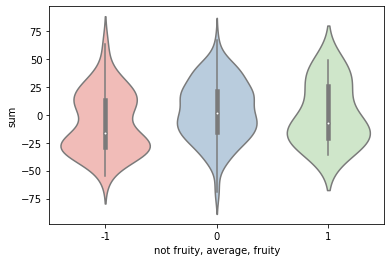

In [29]:
# looking at all cas number which were categories as sweet over all samples

sns.violinplot(x='category_Fruity', y='sum', data=fruity_cas_violin_df, palette="Pastel1")
plt.xlabel("not fruity, average, fruity")
plt.show()

In [30]:
woody_cas_violin_df_labeled = woody_cas_violin_df.copy()
woody_cas_violin_df_labeled['category_Woody_label'] = woody_cas_violin_df_labeled['category_Woody'].replace({
    0: 'average flavor',
    1: 'flavor-specific',
    -1: 'not-flavor'
})

woody_cas_violin_df_labeled = woody_cas_violin_df_labeled.drop(columns=['category_Woody'])

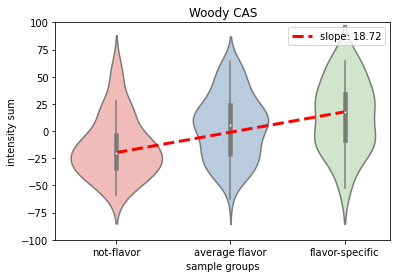

In [31]:
# looking at all cas number which were categories as woody over all samples
sns.violinplot(x='category_Woody_label', y='sum', data=woody_cas_violin_df_labeled, palette="Pastel1", order=['not-flavor','average flavor', 'flavor-specific'])

# lines
medians = woody_cas_violin_df_labeled.groupby("category_Woody_label")["sum"].median()

x_vals = [0, len(medians)-1] 
y_vals = [medians.iloc[-1], medians.iloc[1]] 

slope = (y_vals[1]- y_vals[0]) / (x_vals[1] - x_vals[0])

plt.plot(x_vals, y_vals, color='r', linestyle='--', linewidth=3, label=f'slope: {slope:.2f}')

plt.title("Woody CAS")
plt.ylabel("intensity sum")
plt.xlabel("sample groups")
plt.ylim(-100,100)
plt.legend()
plt.show()


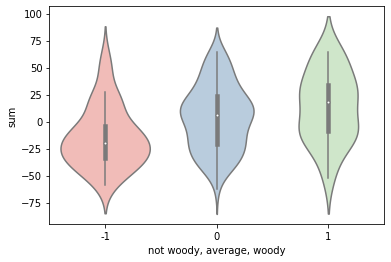

In [32]:
# looking at all cas number which were categories as sweet over all samples
sns.violinplot(x='category_Woody', y='sum', data=woody_cas_violin_df, palette="Pastel1")
plt.xlabel("not woody, average, woody")
plt.show()

#### looking at which cas numbers are significant and whcih are not

In [33]:
# log intensities
# scale y axis 
# line at 0 

def plot_diff_exp_CAS(df,flavor):
    flavor_true = df[df["category_" + str(flavor)] == 1].index
    flavor_false = df[df["category_" + str(flavor)] == -1].index
    
    plt.figure(figsize=(50, 10))           
    plt.bar(df.loc[flavor_true].iloc[:,:-4].columns, df.loc[flavor_true].iloc[:,:-4].mean(axis=0), color='b', alpha=0.5)
    plt.bar(df.loc[flavor_false].iloc[:,:-4].columns, df.loc[flavor_false].iloc[:,:-4].mean(axis=0),color="g",  alpha=0.5)

    plt.axhline(0, color='grey', linewidth=1)  # Add a horizontal line at y=0 (color: grey)

    plt.xlabel('CAS numbers')
    plt.ylabel('intensities over all samples')
    plt.title('labeled CAS numbers x intensities over all samples ')
    legend_entries = [Line2D([0], [0], color='b', lw=4, label=str(flavor) + ' samples'),
                    Line2D([0], [0], color='g', lw=4, label='not ' +str(flavor) +' samples')]
    plt.legend(handles=legend_entries, loc='upper right')
    plt.ylim(-1,1)
    plt.show()


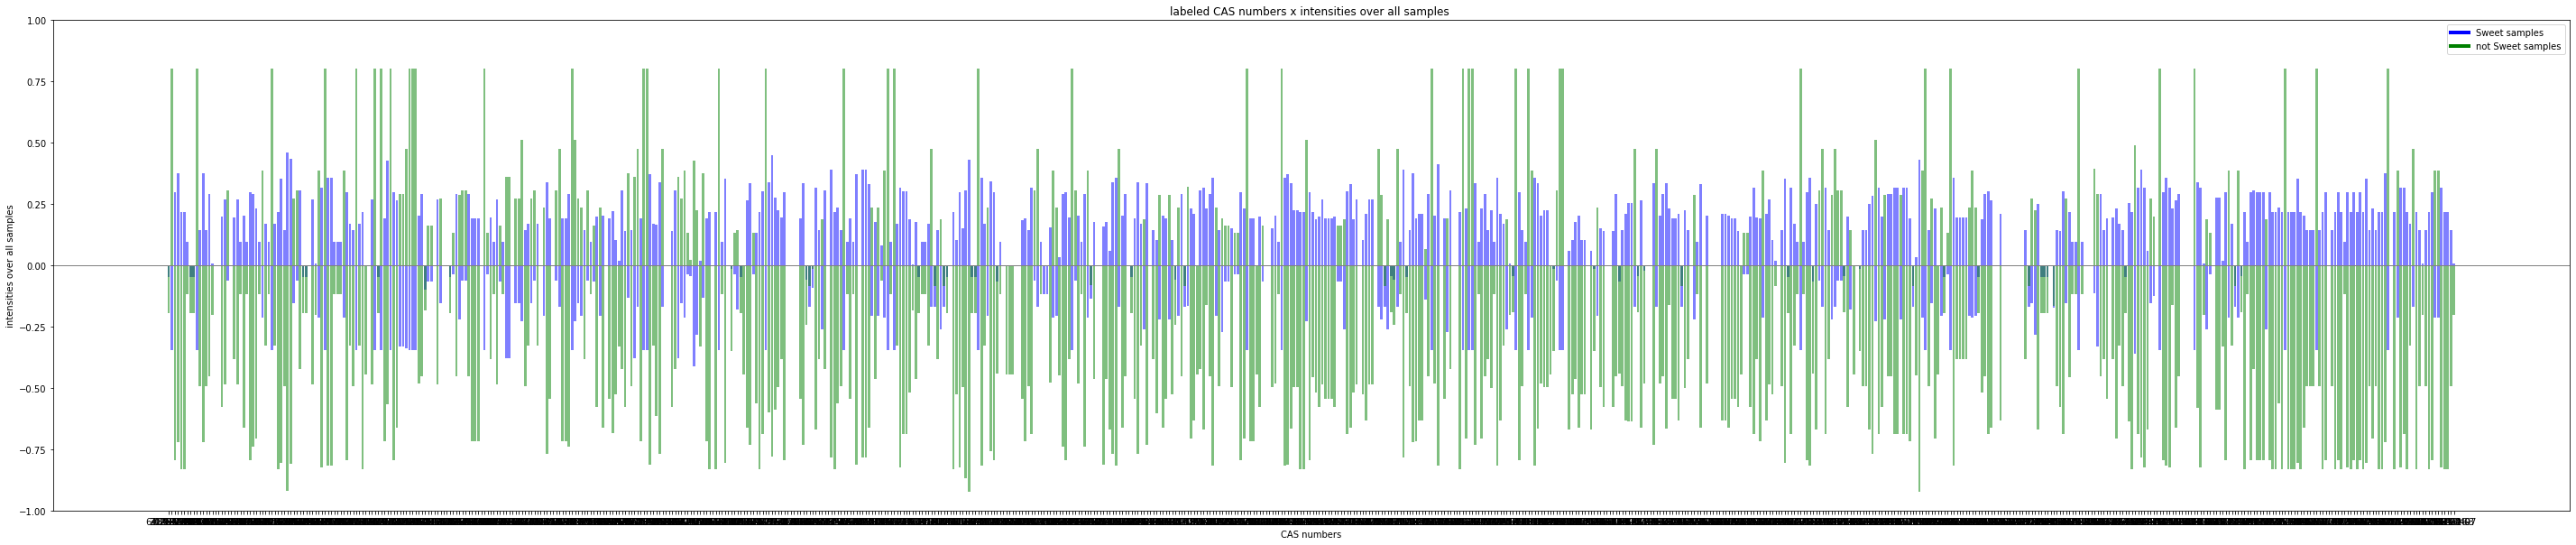

In [34]:
plot_diff_exp_CAS(violin_df,"Sweet")

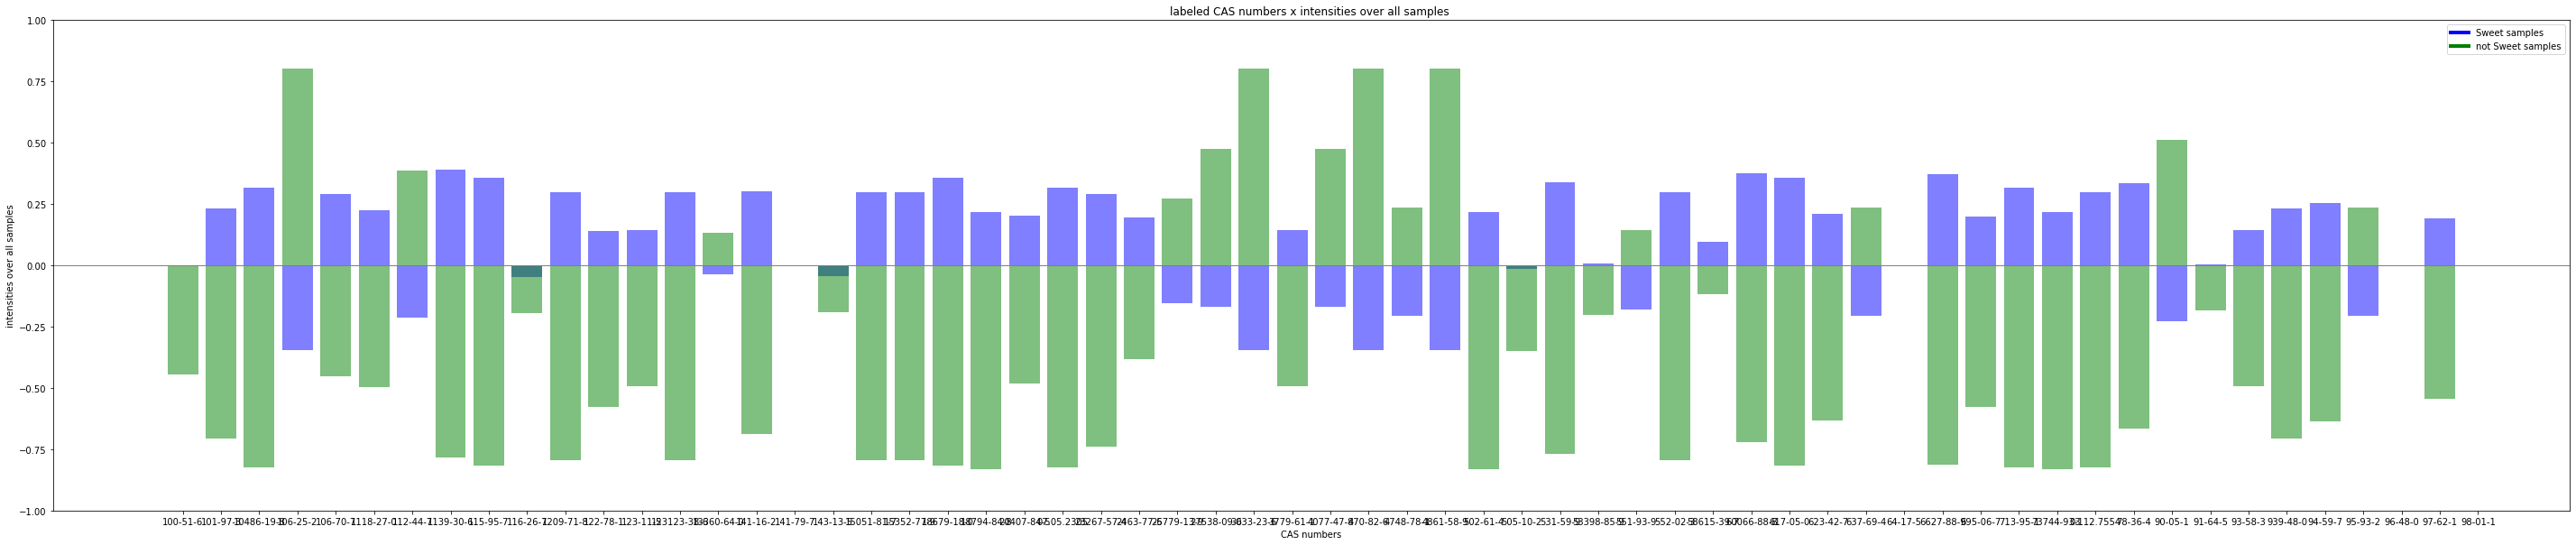

In [35]:
plot_diff_exp_CAS(sweet_cas_violin_df,"Sweet")

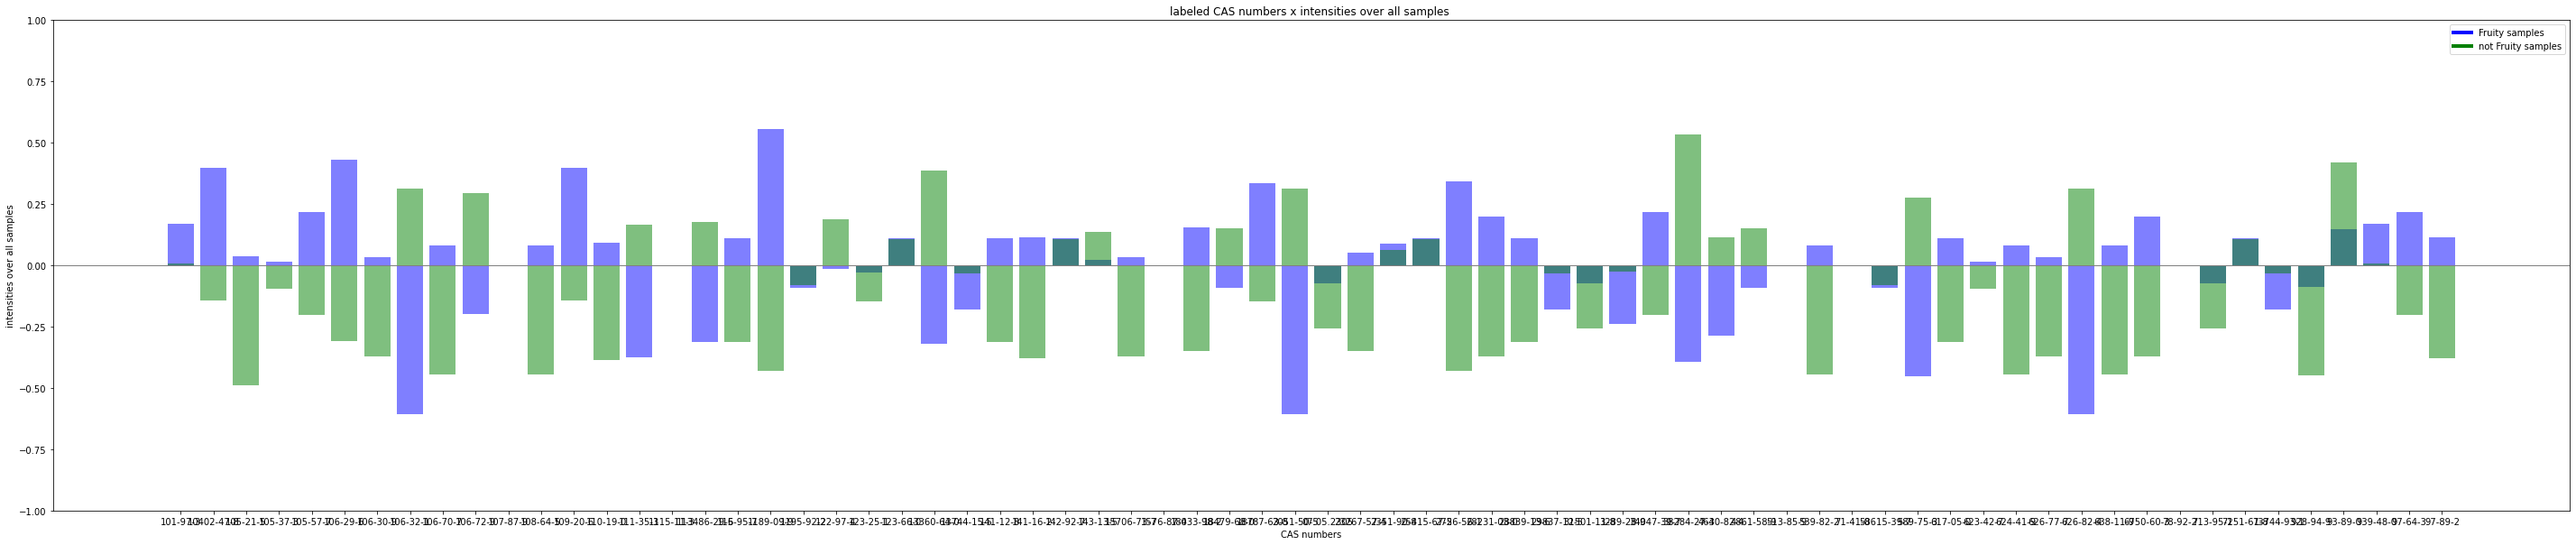

In [36]:
plot_diff_exp_CAS(fruity_cas_violin_df,"Fruity")

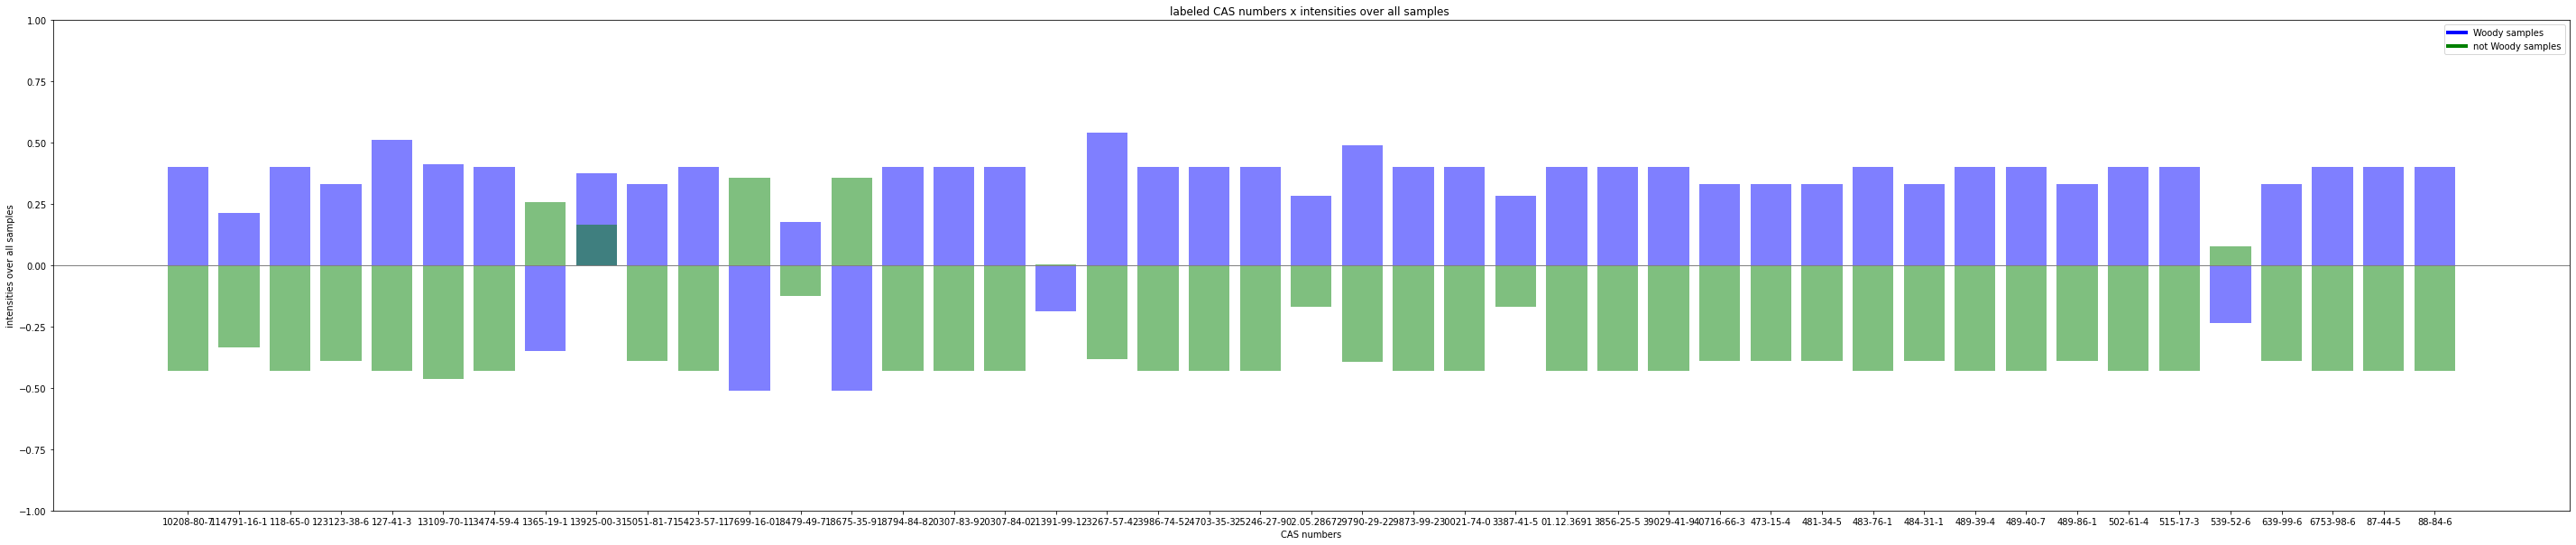

In [37]:
plot_diff_exp_CAS(woody_cas_violin_df,"Woody")

## T - Test
### checking difference of intensity for one CAS between different samples

In [38]:
flavor_true = violin_df[violin_df["category_Sweet"] == 1].index
flavor_false = violin_df[violin_df["category_Sweet"] == -1].index
t_stat, p_val = stats.ttest_ind(violin_df['10486-19-8'].loc[flavor_true], violin_df['10486-19-8'].loc[flavor_false])  
print("t-statistic = " + str(t_stat))  
print("p-value = " + str(p_val))


t-statistic = 3.6424573962037883
p-value = 0.0005475276703364414


In [39]:
# positiv = significant
check_CAS(violin_df,'10486-19-8','Sweet')

1.1384967306354918

### checking difference of intensity for all CAS between different samples

In [102]:
def check_significant_CAS(df, flavor):
    #check this for all Cas numbers that are available
    alpha = 0.05
    labels=[]
    p_values = []
    significant_CAS =[]
    flavor_true = df[df["category_"+ flavor] == 1].index
    flavor_false = df[df["category_"+flavor] == -1].index
    for CAS in df.iloc[:,:-4].columns:
        t_stat, p_val = stats.ttest_ind(df[CAS].loc[flavor_true], df[CAS].loc[flavor_false])  
        print("CAS: " +str(CAS))
        print("t-statistic = " + str(t_stat))  
        print("p-value = " + str(p_val))
        labels.append(CAS)
        p_values.append(p_val)
        if p_val < alpha:
            significant_CAS.append(CAS)
    return(labels, p_values, significant_CAS)

#### sweet

In [41]:
sweet_label, sweet_p_val, sweet_sig_CAS = check_significant_CAS(sweet_cas_violin_df, "Sweet")

CAS: 100-51-6
t-statistic = 1.2375660611539376
p-value = 0.22046967310257123
CAS: 101-97-3
t-statistic = 2.864072919634015
p-value = 0.005674692625992704
CAS: 10486-19-8
t-statistic = 3.6424573962037883
p-value = 0.0005475276703364414
CAS: 106-25-2
t-statistic = -3.533165513770896
p-value = 0.0007749737837252648
CAS: 106-70-7
t-statistic = 2.4908996614404395
p-value = 0.01538945293408396
CAS: 1118-27-0
t-statistic = 2.394462576375238
p-value = 0.01963206130214461
CAS: 112-44-7
t-statistic = -1.9931037468487385
p-value = 0.05058523950546807
CAS: 1139-30-6
t-statistic = 3.669965483801022
p-value = 0.0005012307689240028
CAS: 115-95-7
t-statistic = 3.8083399035913645
p-value = 0.0003196760456414241
CAS: 116-26-7
t-statistic = 0.48464923921480835
p-value = 0.6296060020634198
CAS: 1209-71-8
t-statistic = 3.757960006462603
p-value = 0.0003769367583361269
CAS: 122-78-1
t-statistic = 2.2241493443266025
p-value = 0.029730273462768263
CAS: 123-11-5
t-statistic = 2.187059718274542
p-value = 0.0324

In [42]:
len(sweet_sig_CAS)/len(sweet_cas_violin_df.iloc[:,:-4].columns)

0.6885245901639344

In [43]:
len(sweet_sig_CAS)

42

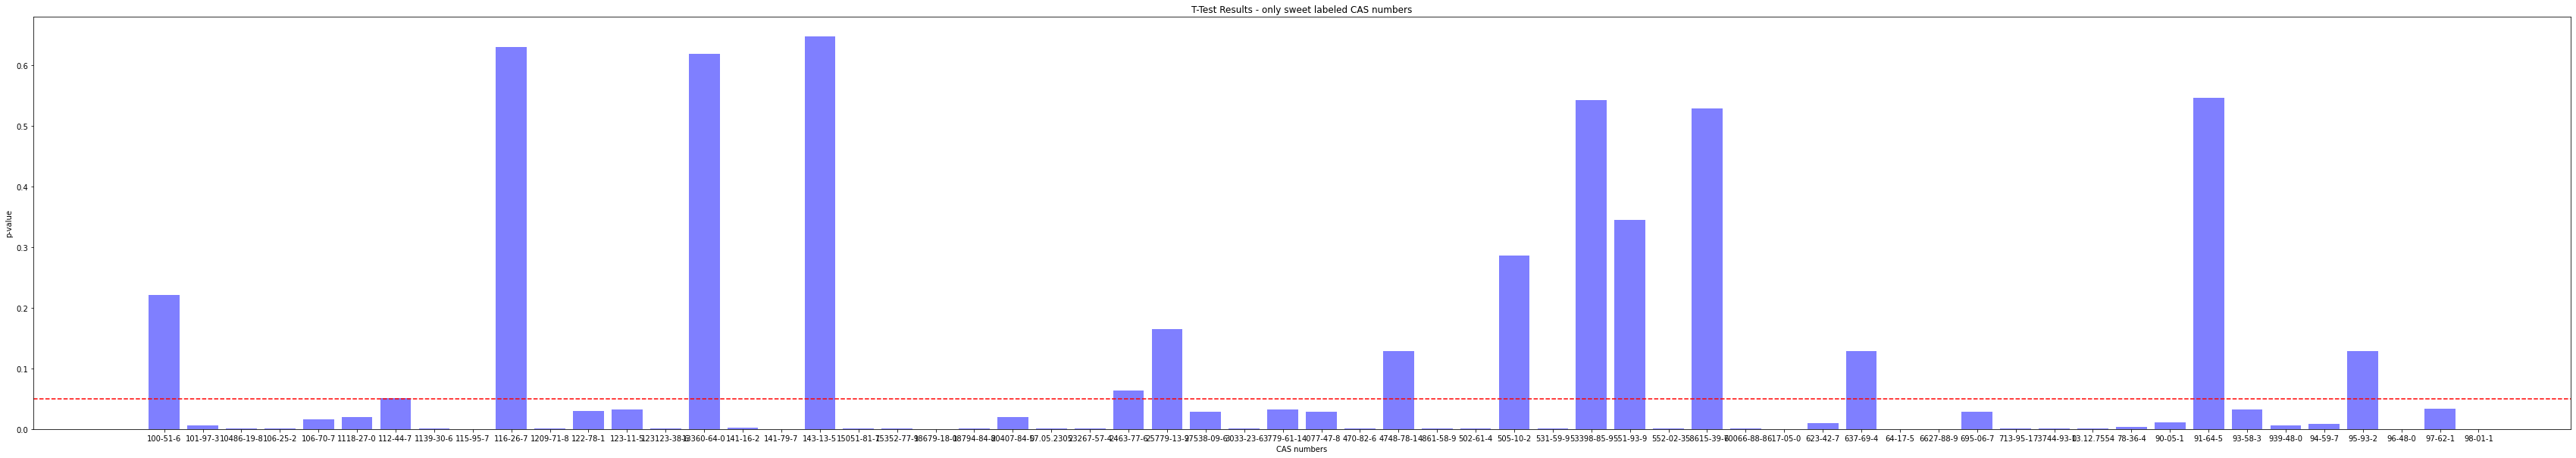

In [44]:
# bar chart of p values
alpha = 0.05
plt.figure(figsize=(60, 10))           
plt.bar(sweet_label, sweet_p_val, color = 'b', alpha = 0.5)
plt.axhline(y=alpha, color='r', linestyle='--', label='Threshold')
plt.xlabel('CAS numbers')
plt.ylabel('p-value')
plt.title('T-Test Results - only sweet labeled CAS numbers')
plt.show()


### fruit 

In [45]:
fruity_label, fruity_p_val, fruity_sig_CAS = check_significant_CAS(fruity_cas_violin_df,'Fruity')

CAS: 101-97-3
t-statistic = 0.5322838734201668
p-value = 0.5964629536207174
CAS: 10402-47-8
t-statistic = 2.0694737230129383
p-value = 0.04274468796604817
CAS: 105-21-5
t-statistic = 2.0496753511060994
p-value = 0.044702280000082015
CAS: 105-37-3
t-statistic = 0.3912710401827064
p-value = 0.6969603022313853
CAS: 105-57-7
t-statistic = 1.7833811456679287
p-value = 0.0794991969434971
CAS: 106-29-6
t-statistic = 2.291794076415683
p-value = 0.025383220269313476
CAS: 106-30-9
t-statistic = 1.8154802017886955
p-value = 0.07436614775761827
CAS: 106-32-1
t-statistic = -3.2809079161824966
p-value = 0.001713585639739425
CAS: 106-70-7
t-statistic = 2.099671608452313
p-value = 0.03990194171880739
CAS: 106-72-9
t-statistic = -1.9198154245276076
p-value = 0.0595609868477099
CAS: 107-87-9
t-statistic = nan
p-value = nan
CAS: 108-64-5
t-statistic = 2.099671608452313
p-value = 0.03990194171880739
CAS: 109-20-6
t-statistic = 2.0694737230129383
p-value = 0.04274468796604817
CAS: 110-19-0
t-statistic = 1.

In [46]:
len(fruity_sig_CAS)/len(fruity_label)

0.24285714285714285

In [47]:
len(fruity_sig_CAS)

17

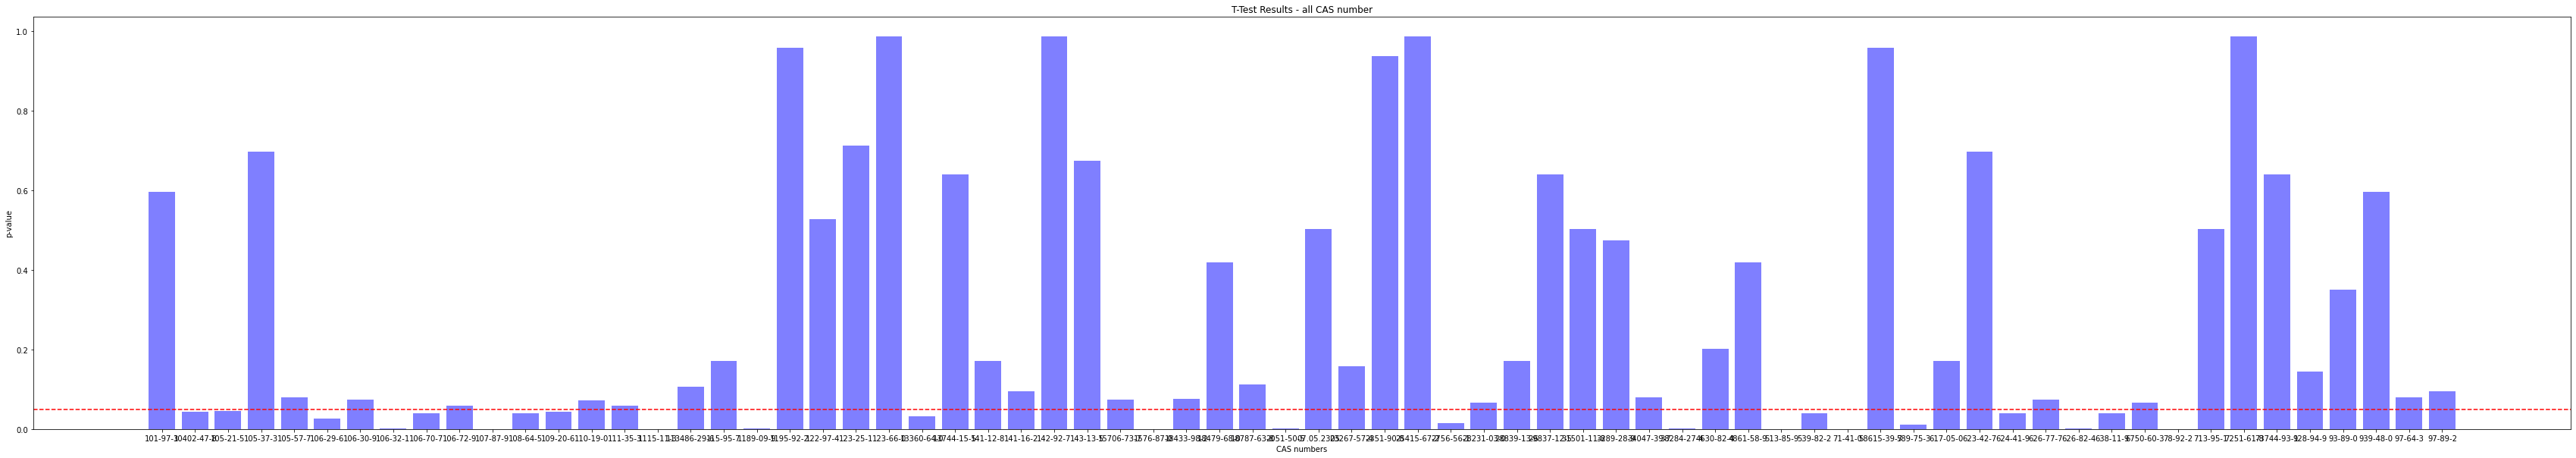

In [48]:
# bar chart of p values
plt.figure(figsize=(60, 10))           
plt.bar(fruity_label, fruity_p_val, color = 'b', alpha = 0.5)
plt.axhline(y=alpha, color='r', linestyle='--', label='Threshold')
plt.xlabel('CAS numbers')
plt.ylabel('p-value')
plt.title('T-Test Results - all CAS number')

plt.show()


### wood 

In [49]:
woody_label, woody_p_val, woody_sig_CAS = check_significant_CAS(woody_cas_violin_df,'Woody')

CAS: 10208-80-7
t-statistic = 3.702611491810662
p-value = 0.00041493618421042916
CAS: 114791-16-1
t-statistic = 2.5426587722786103
p-value = 0.013151617441202008
CAS: 118-65-0
t-statistic = 3.702611491810662
p-value = 0.00041493618421042916
CAS: 123123-38-6
t-statistic = 3.3625431467235694
p-value = 0.001239624250561428
CAS: 127-41-3
t-statistic = 3.849310607608751
p-value = 0.0002540246965437538
CAS: 13109-70-1
t-statistic = 4.09481163719842
p-value = 0.00010917493429530517
CAS: 13474-59-4
t-statistic = 3.702611491810662
p-value = 0.00041493618421042916
CAS: 1365-19-1
t-statistic = -2.6714003149377312
p-value = 0.009334101564817048
CAS: 13925-00-3
t-statistic = 0.7687322577325452
p-value = 0.444566576635096
CAS: 15051-81-7
t-statistic = 3.3625431467235694
p-value = 0.001239624250561428
CAS: 15423-57-1
t-statistic = 3.702611491810662
p-value = 0.00041493618421042916
CAS: 17699-16-0
t-statistic = -3.7455725366979586
p-value = 0.00035979762908650676
CAS: 18479-49-7
t-statistic = 1.283321

In [50]:
len(woody_sig_CAS)/len(woody_label)


0.9111111111111111

In [51]:
len(woody_sig_CAS)

41

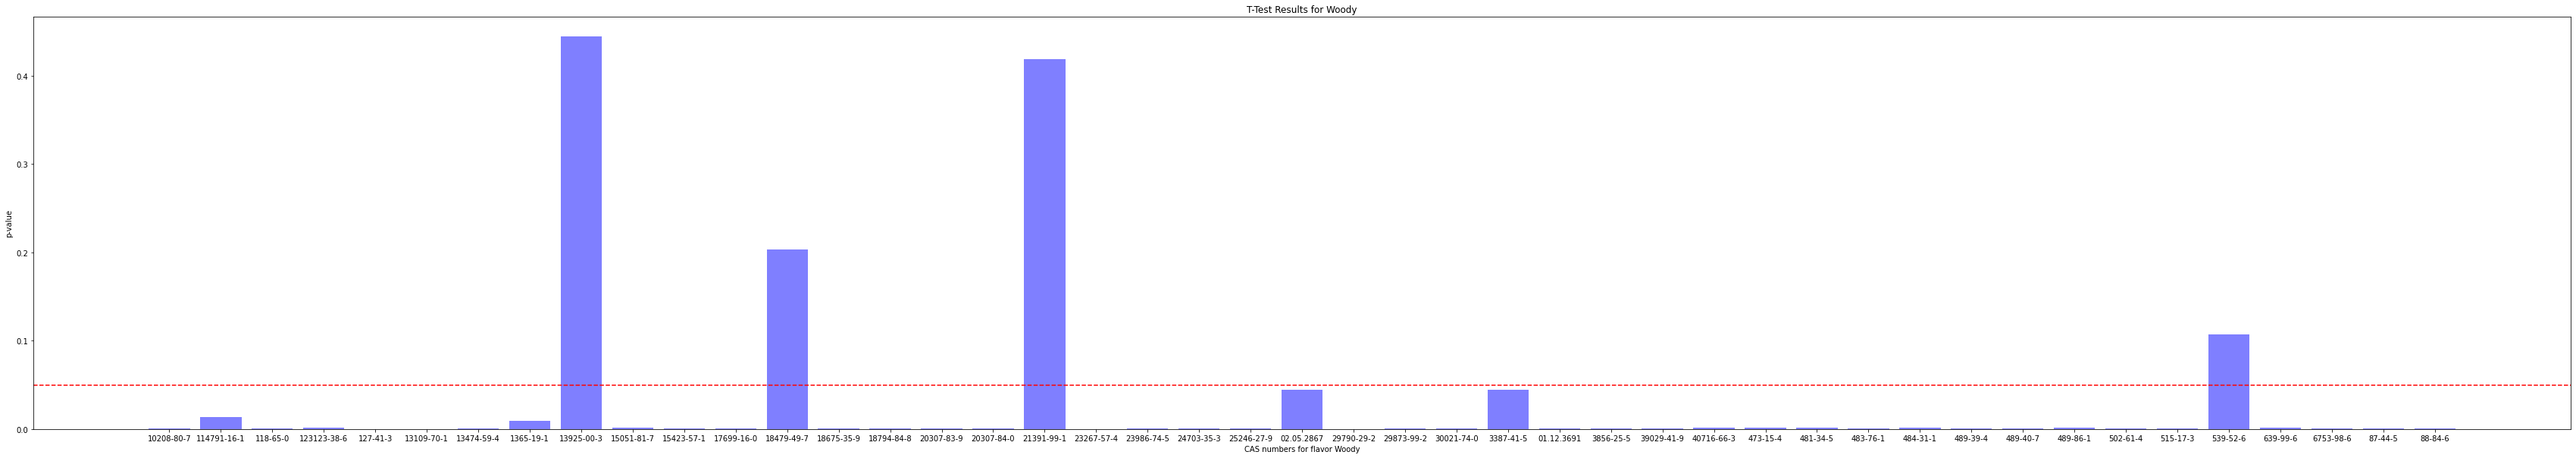

In [52]:
# bar chart of p values
plt.figure(figsize=(60, 10))           
plt.bar(woody_label, woody_p_val, color='b', alpha=0.5)
plt.axhline(y=alpha, color='r', linestyle='--', label='Threshold')
plt.xlabel('CAS numbers for flavor Woody')
plt.ylabel('p-value')
plt.title('T-Test Results for Woody')

plt.show()


#### all CAS numbers regardless the lable


#### sweet

In [108]:
label_all_sweet,p_val_all_sweet, significant_CAS_all_sweet = check_significant_CAS(violin_df,'Sweet')

CAS: 6485-40-1
t-statistic = 0.48464923921480835
p-value = 0.6296060020634198
CAS: 3033-23-6
t-statistic = -3.533165513770896
p-value = 0.0007749737837252648
CAS: 21284-22-0
t-statistic = 3.757960006462603
p-value = 0.0003769367583361269
CAS: 38427-78-0
t-statistic = 3.582380664701774
p-value = 0.0006632164577014994
CAS: 495-61-4
t-statistic = 3.5779177678209204
p-value = 0.000672681386266456
CAS: 29873-99-2
t-statistic = 3.5779177678209204
p-value = 0.000672681386266456
CAS: 6909-30-4
t-statistic = 0.6342667924031941
p-value = 0.5282031981154227
CAS: 99-49-0
t-statistic = 0.48464923921480835
p-value = 0.6296060020634198
CAS: 2244-16-8
t-statistic = 0.48464923921480835
p-value = 0.6296060020634198
CAS: 876-17-5
t-statistic = -3.533165513770896
p-value = 0.0007749737837252648
CAS: 5989-27-5
t-statistic = 2.187059718274542
p-value = 0.03245831045104094
CAS: 4674-50-4
t-statistic = 3.582380664701774
p-value = 0.0006632164577014994
CAS: 2243-33-6
t-statistic = 2.187059718274542
p-value = 0

CAS: 56805-23-3
t-statistic = -1.2452933880355657
p-value = 0.21763586572223886
CAS: 92356-06-4
t-statistic = 2.4939187523794666
p-value = 0.015271103636024361
CAS: 15186-51-3
t-statistic = 0.48464923921480835
p-value = 0.6296060020634198
CAS: 125811-37-2
t-statistic = 0.48464923921480835
p-value = 0.6296060020634198
CAS: 1576-95-0
t-statistic = nan
p-value = nan
CAS: 928-96-1
t-statistic = 2.4031554773001162
p-value = 0.019210663541813368
CAS: 53398-85-9
t-statistic = 0.6116142170739591
p-value = 0.5429938976641091
CAS: 16491-36-4
t-statistic = -1.9931037468487385
p-value = 0.05058523950546807
CAS: 31501-11-8
t-statistic = 3.6424573962037883
p-value = 0.0005475276703364414
CAS: 21662-09-9
t-statistic = -3.533165513770896
p-value = 0.0007749737837252648
CAS: 15456-69-6
t-statistic = 3.8083399035913645
p-value = 0.0003196760456414241
CAS: 18679-18-0
t-statistic = 3.8083399035913645
p-value = 0.0003196760456414241
CAS: 1197-06-4
t-statistic = 0.6342667924031941
p-value = 0.52820319811542

In [ ]:
print(len(significant_CAS_all_sweet))
print(len(significant_CAS_all_sweet)/len(label_all_sweet))

51
0.06967213114754098


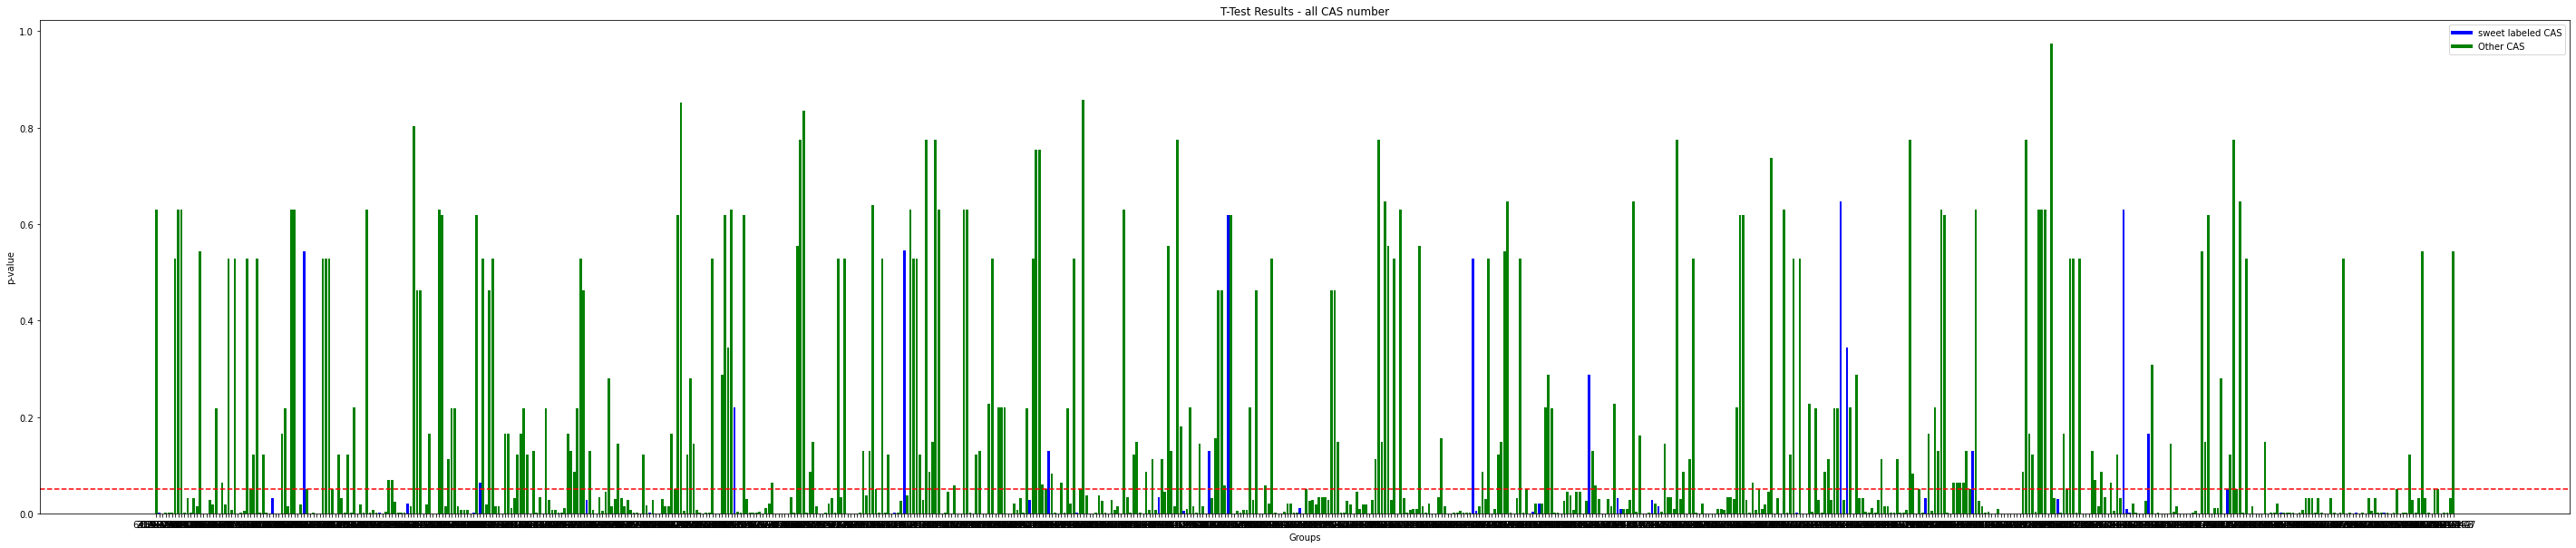

In [55]:
# bar chart of p values
plt.figure(figsize=(50, 10))           
colors = ['b' if x in sweet_descriptors_CAS else 'g' for x in label_all_sweet]
plt.bar(label_all_sweet, p_val_all_sweet, color=colors)
plt.axhline(y=alpha, color='r', linestyle='--', label='Threshold')
plt.xlabel('Groups')
plt.ylabel('p-value')
plt.title('T-Test Results - all CAS number')
legend_entries = [Line2D([0], [0], color='b', lw=4, label='sweet labeled CAS'),
                  Line2D([0], [0], color='g', lw=4, label='Other CAS')]
plt.legend(handles=legend_entries)

plt.show()


#### woody

In [106]:
label_all_woody,p_val_all_woody, significant_CAS_all_woody = check_significant_CAS(violin_df,'Woody')


CAS: 6485-40-1
t-statistic = -1.632193711554786
p-value = 0.10700505397008242
CAS: 3033-23-6
t-statistic = -3.7455725366979586
p-value = 0.00035979762908650676
CAS: 21284-22-0
t-statistic = 3.3625431467235694
p-value = 0.001239624250561428
CAS: 38427-78-0
t-statistic = 4.338934431471814
p-value = 4.588626320713935e-05
CAS: 495-61-4
t-statistic = 3.702611491810662
p-value = 0.00041493618421042916
CAS: 29873-99-2
t-statistic = 3.702611491810662
p-value = 0.00041493618421042916
CAS: 6909-30-4
t-statistic = 2.483829735680774
p-value = 0.015325976114940047
CAS: 99-49-0
t-statistic = -1.632193711554786
p-value = 0.10700505397008242
CAS: 2244-16-8
t-statistic = -1.632193711554786
p-value = 0.10700505397008242
CAS: 876-17-5
t-statistic = -3.7455725366979586
p-value = 0.00035979762908650676
CAS: 5989-27-5
t-statistic = 2.049491753864103
p-value = 0.0440579150934069
CAS: 4674-50-4
t-statistic = 4.338934431471814
p-value = 4.588626320713935e-05
CAS: 2243-33-6
t-statistic = 2.049491753864103
p-val


t-statistic = -2.3479721595136636
p-value = 0.02162672401367812
CAS: 122-00-9
t-statistic = -1.6993349917017795
p-value = 0.0935731055180527
CAS: 1126-51-8
t-statistic = 3.2465186860264605
p-value = 0.0017747663526262278
CAS: 131671-56-2
t-statistic = -1.3141579250058104
p-value = 0.1929645155838786
CAS: 2785-89-9
t-statistic = 2.483829735680774
p-value = 0.015325976114940047
CAS: 6728-31-0
t-statistic = -1.141837946732328
p-value = 0.25730462723398423
CAS: 695-06-7
t-statistic = 0.31722000718435334
p-value = 0.7519947263760485
CAS: 31539-84-1
t-statistic = -1.6993349917017795
p-value = 0.0935731055180527
CAS: 19872-52-7
t-statistic = 2.582906695848532
p-value = 0.011828749623873164
CAS: 141-79-7
t-statistic = nan
p-value = nan
CAS: 818-49-5
t-statistic = 3.2883944352559418
p-value = 0.0015605405594967033
CAS: 693-95-8
t-statistic = 0.818896171334483
p-value = 0.41554792031609067
CAS: 34047-39-7
t-statistic = 1.9433606676265667
p-value = 0.05588201300652318
CAS: 18060-79-2
t-statistic

In [107]:
print(len(significant_CAS_all_woody))
print(len(significant_CAS_all_woody)/len(label_all_woody))

444
0.6065573770491803


#### fruity

In [103]:
label_all_fruity,p_val_all_fruity, significant_CAS_all_fruity = check_significant_CAS(violin_df,'Fruity')


CAS: 6485-40-1
t-statistic = -0.9399886130150678
p-value = 0.35093086979334287
CAS: 3033-23-6
t-statistic = -0.8145345563926166
p-value = 0.4185074208278361
CAS: 21284-22-0
t-statistic = 2.443825376912026
p-value = 0.01743987695400043
CAS: 38427-78-0
t-statistic = 1.7748137348611392
p-value = 0.0809181040077489
CAS: 495-61-4
t-statistic = -0.46947941359028766
p-value = 0.6404008706062603
CAS: 29873-99-2
t-statistic = -0.46947941359028766
p-value = 0.6404008706062603
CAS: 6909-30-4
t-statistic = -0.05139113533232176
p-value = 0.959181767420828
CAS: 99-49-0
t-statistic = -0.9399886130150678
p-value = 0.35093086979334287
CAS: 2244-16-8
t-statistic = -0.9399886130150678
p-value = 0.35093086979334287
CAS: 876-17-5
t-statistic = -0.8145345563926166
p-value = 0.4185074208278361
CAS: 5989-27-5
t-statistic = -0.6350076150303994
p-value = 0.5277982333245715
CAS: 4674-50-4
t-statistic = 1.7748137348611392
p-value = 0.0809181040077489
CAS: 2243-33-6
t-statistic = -0.6350076150303994
p-value = 0.52

In [104]:
print(len(significant_CAS_all_fruity))
print(len(significant_CAS_all_fruity)/len(label_all_fruity))

139
0.18989071038251365


In [60]:
#SUMMARY: 
print('significant molecules')
print("FN Sweet: " + str(len(sweet_sig_CAS)))
print("all Sweet: " + str(len(significant_CAS_all_sweet)))
print("FN Fruity: " + str(len(fruity_sig_CAS)))
print("all Fruity: " + str(len(significant_CAS_all_fruity)))
print("FN Woody: " + str(len(woody_sig_CAS)))
print("all Woody: " + str(len(significant_CAS_all_woody)))

significant molecules
FN Sweet: 42
all Sweet: 398
FN Fruity: 17
all Fruity: 139
FN Woody: 41
all Woody: 444


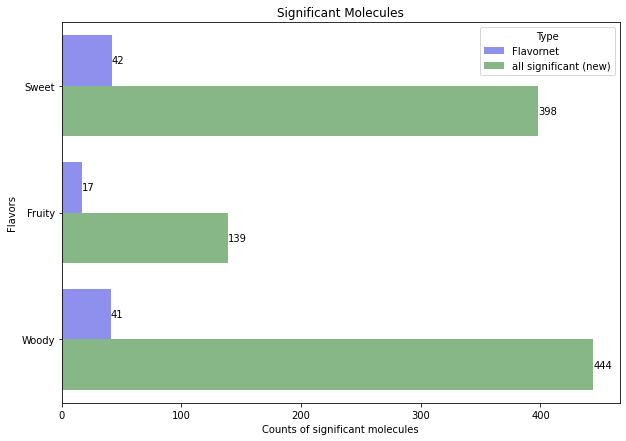

In [61]:
categories = ['Sweet', 'Fruity', 'Woody']
counts_FN = [len(sweet_sig_CAS), len(fruity_sig_CAS), len(woody_sig_CAS)]
counts_All = [len(significant_CAS_all_sweet), len(significant_CAS_all_fruity), len(significant_CAS_all_woody)]

df = pd.DataFrame({'Category': categories + categories, 
                   'Counts': counts_FN + counts_All, 
                   'Type': ['Flavornet']*len(categories) + ['all significant (new)']*len(categories)})

plt.figure(figsize=(10, 7))
ax = sns.barplot(y='Category', x='Counts', hue='Type', data=df, palette={'Flavornet': 'b', 'all significant (new)': 'g'}, alpha=0.5)

plt.ylabel('Flavors')
plt.xlabel('Counts of significant molecules')
plt.title('Significant Molecules')

for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', color='black', fontsize=10)

# Show the plot
plt.show()


### Predictive Models 
#### Linear Regression

In [62]:
panelist_df_norm = stats.zscore(panelist_data_comp)

In [63]:
from scipy.optimize import leastsq

def find_best_params(x, y):
    x=np.nan_to_num(x)
    def score( p, x,y):
        prediction = np.dot(x,p)
        #print(prediction)
        #print(np.sum(np.abs(prediction-y)))
        return np.hstack((prediction-y,p))
    
    p0=np.ones(np.shape(x)[1])
    p1 = leastsq(score, p0,(x,y),epsfcn=1)[0]
    
    prediction = np.dot(p1,x.T)
    return(p1,prediction)

In [64]:
p_sweet, prediction_sweet= find_best_params(np.array( ms_data_comp ),np.array(panelist_df_norm['Sweet']))
p_fruity,prediction_fruity= find_best_params(np.array( ms_data_comp ),np.array(panelist_df_norm['Fruity']))
p_woody,prediction_woody= find_best_params(np.array( ms_data_comp ),np.array(panelist_df_norm['Woody']))
p_malt,prediction_malt= find_best_params(np.array( ms_data_comp ),np.array(panelist_df_norm['Malt']))
p_floral, prediction_floral= find_best_params(np.array( ms_data_comp ),np.array(panelist_df_norm['Floral']))
p_peaty, prediction_peaty= find_best_params(np.array( ms_data_comp ),np.array(panelist_df_norm['Peaty']))
p_driedfruits,prediction_dried_fruits= find_best_params(np.array( ms_data_comp ),np.array(panelist_df_norm['Dried_fruits']))
p_complex,prediction_complexity= find_best_params(np.array( ms_data_comp ),np.array(panelist_df_norm['Complexity']))
p_aftertaste, prediction_aftertaste= find_best_params(np.array( ms_data_comp ),np.array(panelist_df_norm['Aftertaste']))


In [65]:
'''import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

all_p = np.append(np.append(np.append(np.append(np.append(np.append(np.append( p_sweet , p_fruity), p_woody), p_malt), p_peaty), p_driedfruits), p_complex),p_aftertaste )
# Create the data
test = dict(x = all_p, g = (["Sweet"]* 732+ ["Fruity"]*732+ ["Woody"]*732+ ["Malt"]*732+ ["Peaty"]*732+ ["Dried_fruits"]*732 + ["Complexity"]*732+ ["Aftertaste"]*732))
df = pd.DataFrame(test)

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=10, height=1, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
#g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)'''

'import numpy as np\nimport pandas as pd\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nsns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})\n\nall_p = np.append(np.append(np.append(np.append(np.append(np.append(np.append( p_sweet , p_fruity), p_woody), p_malt), p_peaty), p_driedfruits), p_complex),p_aftertaste )\n# Create the data\ntest = dict(x = all_p, g = (["Sweet"]* 732+ ["Fruity"]*732+ ["Woody"]*732+ ["Malt"]*732+ ["Peaty"]*732+ ["Dried_fruits"]*732 + ["Complexity"]*732+ ["Aftertaste"]*732))\ndf = pd.DataFrame(test)\n\n# Initialize the FacetGrid object\npal = sns.cubehelix_palette(10, rot=-.25, light=.7)\ng = sns.FacetGrid(df, row="g", hue="g", aspect=10, height=1, palette=pal)\n\n# Draw the densities in a few steps\ng.map(sns.kdeplot, "x",\n      bw_adjust=.5, clip_on=False,\n      fill=True, alpha=1, linewidth=1.5)\ng.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)\n\n# passing color=None to refline() uses the hue mapping\ng.refline(y=

In [66]:
def show_correlation_pred(prediction,reference,flavor):

    true_pos = (reference>0) & (prediction>0)
    true_neg = (reference<=0) & (prediction<=0)
  

    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)

    plt.hist(reference, color ='g', alpha = 0.5)
    plt.hist(prediction, alpha=0.5, color ='b')
    
    plt.xlim(-3, 3.5)
    plt.ylim(0, 130)
    
    labels= ["reference","prediction"]
    plt.legend(labels)

    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    
    plt.subplot(1,2,2)
    plt.plot(prediction,reference,"o", color='b', alpha =0.5)
    
    plt.title("Correlation: "+ str(round(np.corrcoef(np.array(prediction), reference)[0,1],4)))
    
    plt.xlim(-3,3.5)
    plt.ylim(-4,4)

    plt.suptitle(flavor)

     # Add text next to the plot
    text = ('True positive rate: ',
            round(np.sum(true_pos==True)/np.sum(prediction>0),4), '\nTrue negative rate: ', round(np.sum(true_neg==True)/np.sum(prediction<=0),4))


    plt.text(4, 0, '\n'.join(map(str, text)), fontsize=12, va='bottom', color='black')

    plt.show()

In [89]:
samples = list(ms_data_comp['100-51-6'].index)

In [100]:
def show_correlation_pred_extend(prediction,reference,flavor):

    true_pos = (reference>0) & (prediction>0)
    true_neg = (reference<=0) & (prediction<=0)
  

    plt.figure(figsize=(15,5))
    
    plt.subplot(1,3,1)

    for i, sample in enumerate(samples):
        plt.plot(['reference','prediction'], [reference[i],prediction[i]], color='#7f7fff', marker='o', markersize=5)

    ticks = plt.xticks(['reference','prediction'])
    yl = plt.ylim(-3.5,3.5)

    plt.ylabel('flavor score')
    
    plt.subplot(1,3,2)

    plt.hist(reference, color ='g', alpha = 0.5)
    plt.hist(prediction, alpha=0.5, color ='b')
    
    plt.xlim(-3, 3.5)
    plt.ylim(0, 130)
    
    labels= ["reference","prediction"]
    plt.legend(labels)

    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    
    plt.subplot(1,3,3)
    plt.plot(prediction,reference,"o", color='b', alpha =0.5)
    
    plt.title("Correlation: "+ str(round(np.corrcoef(np.array(prediction), reference)[0,1],4)))
    
    plt.xlim(-3,3.5)
    plt.ylim(-4,4)

    plt.suptitle(flavor)

     # Add text next to the plot
    text = ('True positive rate: ',
            round(np.sum(true_pos==True)/np.sum(prediction>0),4), '\nTrue negative rate: ', round(np.sum(true_neg==True)/np.sum(prediction<=0),4))


    plt.text(4, 0, '\n'.join(map(str, text)), fontsize=12, va='bottom', color='black')

    plt.show()

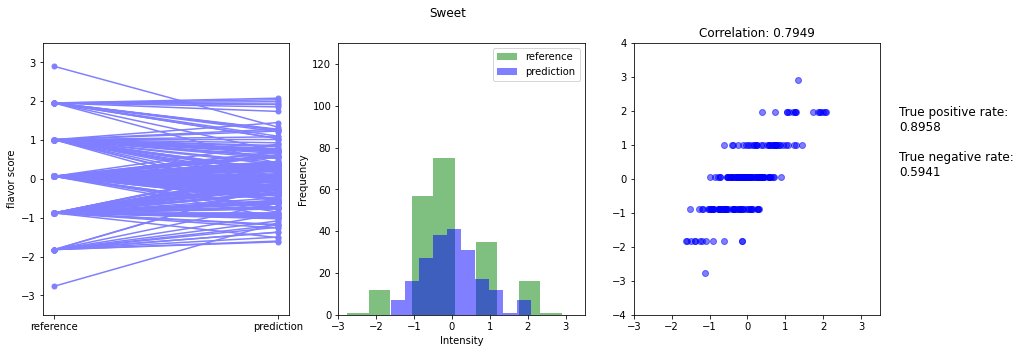

In [101]:
show_correlation_pred_extend(prediction_sweet, panelist_df_norm['Sweet'],"Sweet")


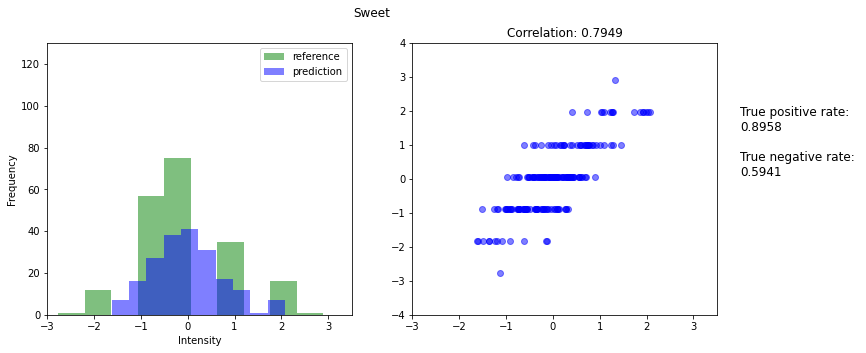

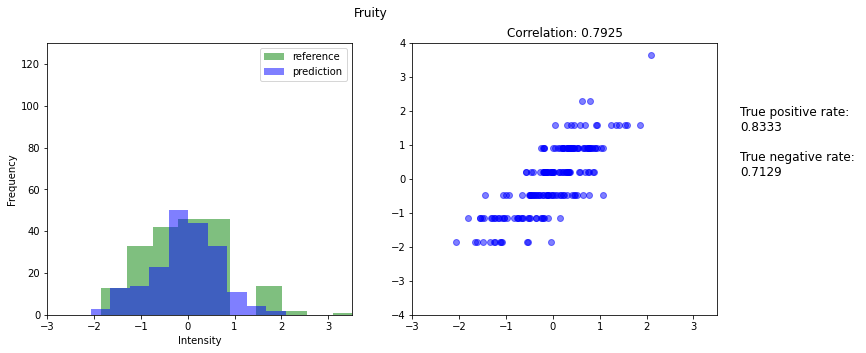

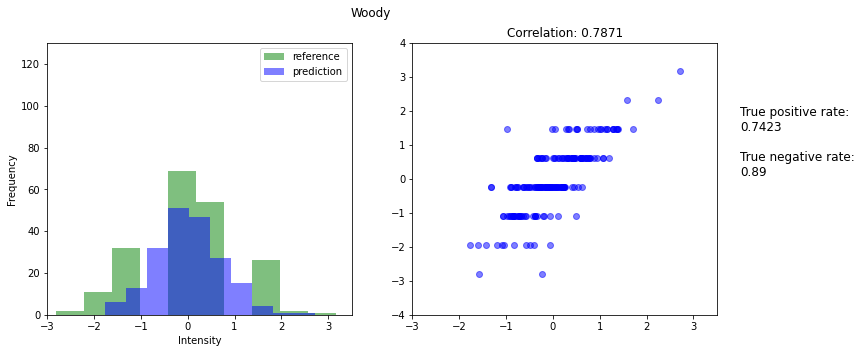

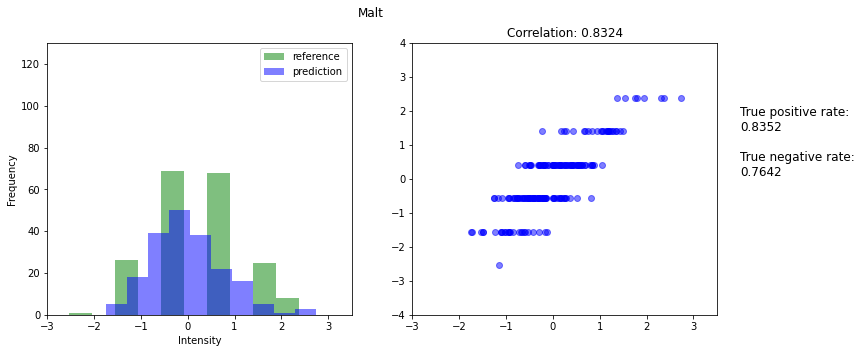

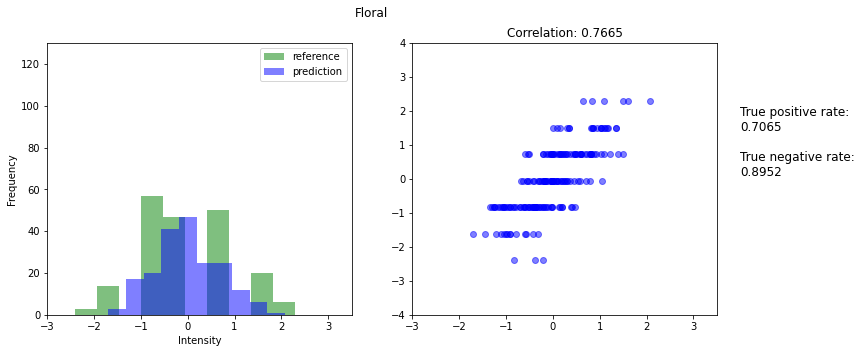

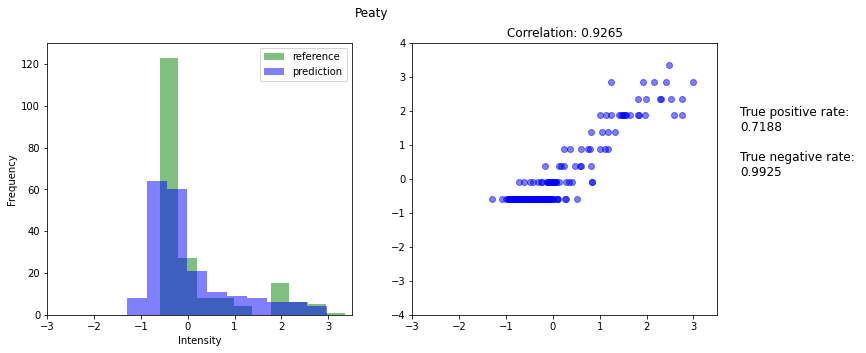

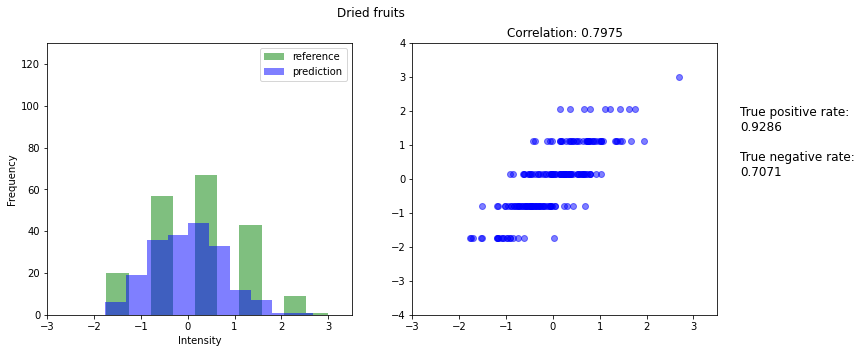

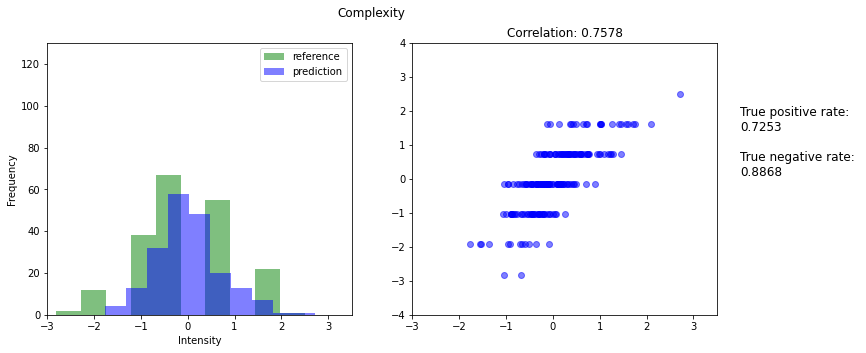

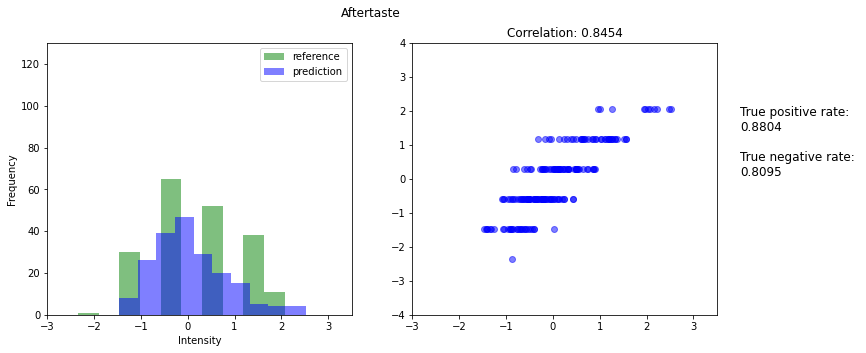

In [67]:
show_correlation_pred(prediction_sweet, panelist_df_norm['Sweet'],"Sweet")
show_correlation_pred(prediction_fruity,panelist_df_norm['Fruity'],"Fruity")
show_correlation_pred(prediction_woody,panelist_df_norm['Woody'],"Woody")
show_correlation_pred(prediction_malt,panelist_df_norm['Malt'],"Malt")
show_correlation_pred(prediction_floral,panelist_df_norm['Floral'],"Floral")
show_correlation_pred(prediction_peaty,panelist_df_norm['Peaty'],"Peaty")
show_correlation_pred(prediction_dried_fruits,panelist_df_norm['Dried_fruits'],"Dried fruits")
show_correlation_pred(prediction_complexity,panelist_df_norm['Complexity'],"Complexity")
show_correlation_pred(prediction_aftertaste,panelist_df_norm['Aftertaste'],"Aftertaste")

# sweet: 79.49
# fruity: 79.25
# woody: 78.71 
# malt: 83.24
# Floral:76.65
# Peaty: 92.65
# Driedfruits: 79.75
# complexity: 75.78
# aftertaste 84.54

#### Flavornet labeled molecules (Sweet, fruity, woody)

In [68]:
fn_sweet_df = ms_data_comp[sweet_descriptors_CAS]
fn_fruity_df = ms_data_comp[fruit_descriptors_CAS]
fn_woody_df = ms_data_comp[wood_descriptors_CAS]

In [69]:
p_sweet_fn, prediction_sweet_fn = find_best_params(np.array( fn_sweet_df),np.array(panelist_df_norm['Sweet']))
p_fruity_fn, prediction_fruity_fn = find_best_params(np.array( fn_fruity_df),np.array(panelist_df_norm['Fruity']))
p_woody_fn, prediction_woody_fn = find_best_params(np.array( fn_woody_df ),np.array(panelist_df_norm['Woody']))


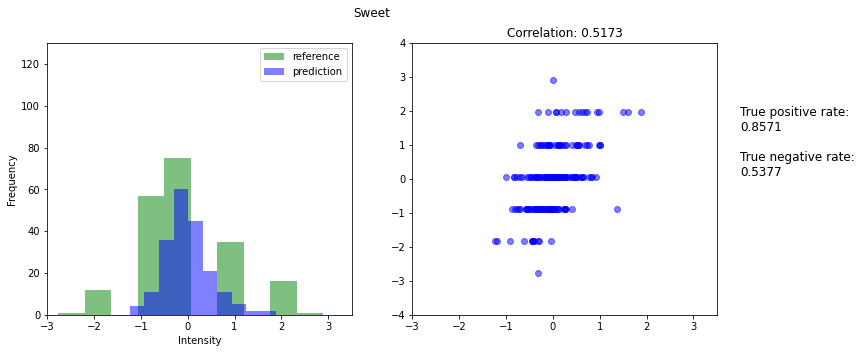

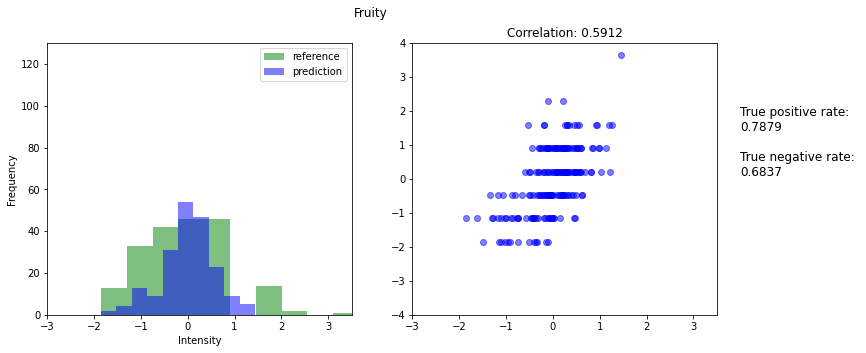

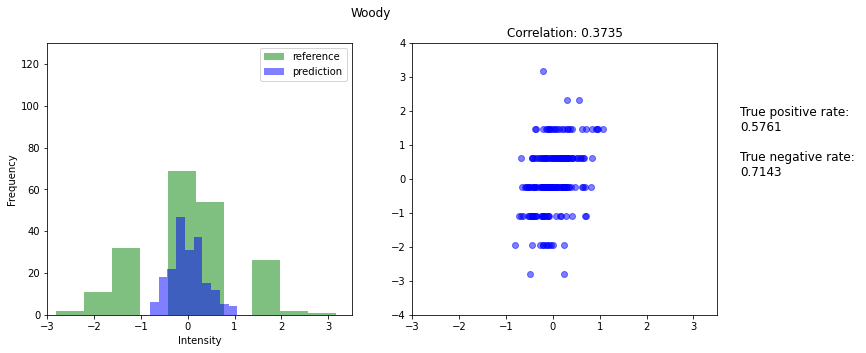

In [70]:
show_correlation_pred(prediction_sweet_fn,np.array(panelist_df_norm['Sweet']),"Sweet")
show_correlation_pred(prediction_fruity_fn,np.array(panelist_df_norm['Fruity']),"Fruity")
show_correlation_pred(prediction_woody_fn,np.array(panelist_df_norm['Woody']),"Woody")


### new labeled molecules

In [71]:
#SUMMARY: 
print('significant molecules')
print("FN Sweet: " + str(len(sweet_sig_CAS)))
print("all Sweet: " + str(len(significant_CAS_all_sweet)))
print("FN Fruity: " + str(len(fruity_sig_CAS)))
print("all Fruity: " + str(len(significant_CAS_all_fruity)))
print("FN Woody: " + str(len(woody_sig_CAS)))
print("all Woody: " + str(len(significant_CAS_all_woody)))

significant molecules
FN Sweet: 42
all Sweet: 398
FN Fruity: 17
all Fruity: 139
FN Woody: 41
all Woody: 444


In [72]:
new_sweet_df = ms_data_comp[significant_CAS_all_sweet]
new_fruity_df = ms_data_comp[significant_CAS_all_fruity]
new_woody_df = ms_data_comp[significant_CAS_all_woody]

In [73]:
p_sweet_new, prediction_sweet_new = find_best_params(np.array( new_sweet_df ),np.array(panelist_df_norm['Sweet']))
p_fruity_new, prediction_fruity_new = find_best_params(np.array( new_fruity_df),np.array(panelist_df_norm['Fruity']))
p_woody_new, prediction_woody_new = find_best_params(np.array( new_woody_df ),np.array(panelist_df_norm['Woody']))


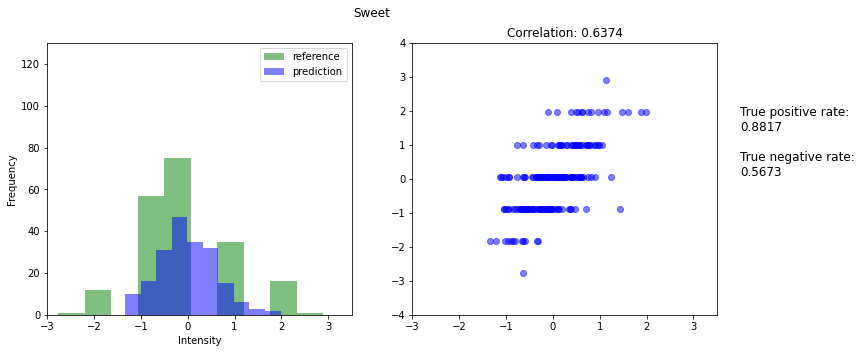

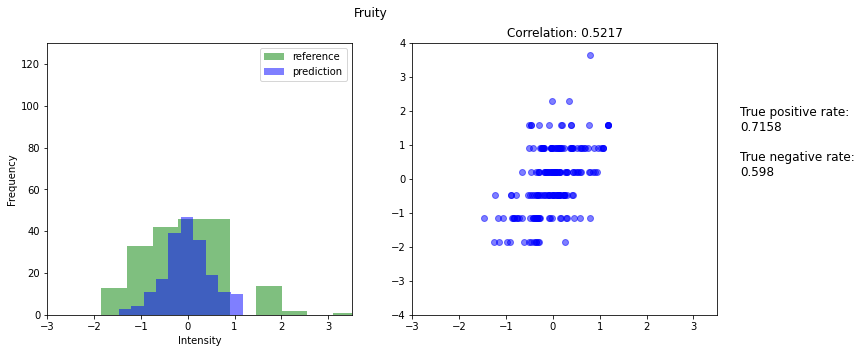

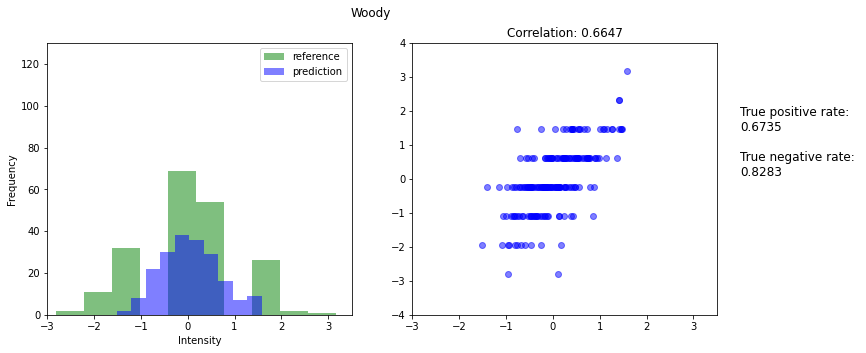

In [74]:
show_correlation_pred(prediction_sweet_new,np.array(panelist_df_norm['Sweet']),"Sweet")
show_correlation_pred(prediction_fruity_new,np.array(panelist_df_norm['Fruity']),"Fruity")
show_correlation_pred(prediction_woody_new,np.array(panelist_df_norm['Woody']),"Woody")
